# Generating Walk Prevalence

We can use walk prevalence to determine the frequency of walking trips within a given geographical area, and compare values between counties or census tracts for a better understanding of population movement. Walk prevalence is defined as the number of walking trips per capita by either census tract or county. We use the following equation to calculate walk prevalence:

$$
WalkPrevalence_{geographicArea} = \frac{TripCount_{geographicArea}}{PopulationEstimate_{geographicArea}}
$$

$TripCount$ uses the total count of unique walking trips from the `final_walks` table in `Quickstart.ipynb` to ensure that walking trip trajectories are within walkable areas in the census tract or county. If using census tracts for the $geographicArea$, walking trips that pass through multiple census tracts count for each crossed tract.

$PopulationEstimate$ is derived from the census tract-level population estimates provided by the [U.S Census American Community Survey (ACS)](https://www.census.gov/programs-surveys/acs/about.html). At the time of documentation, the most recent population estimate available is 2022. However, inputting a valid Census API key in `tractWalkPrevalence()` will allow users to access population estimates for years outside of 2022.

### County-Level Walk Prevalence
We can use the extracted walks data (`final_walks`) or the `san_francisco_walks` package data to find the total number of walking trips per capita by county using `county_walk_prevalence()`. In this example, we use the 2022 county lines for __San Francisco County, CA__, the synthetic walk data generated within `san_francisco_walks`, and the cached census tract-level population estimates from the 2022 5-year American Community Survey (ACS).

In [1]:
from utils import *

county_name = "San Francisco"
state = "CA"
year = 2022

# read in synthetic walks in walkable areas from San Francisco County, CA
san_francisco_walks = pd.read_csv("../data-raw/san_francisco_walks.csv.gz")

# File path of the cached 2022 ACS tract population estimates
acs_path = "../data-raw/US_tract_population2022.csv.gz"

# return the county-level walk prevalence summary
county_walk_prev = countyWalkPrevalence(san_francisco_walks, county_name=county_name, state = state, year = year, ACSpath=acs_path)
county_walk_prev

No Census API key provided, using cached 2022 ACS population data
Using FIPS code '06' for input 'CA'
Using FIPS code '075' for input 'San Francisco'


,count_walkable,pop_estimate,walk_prev
0,2882,851036,0.003386


Since the American Community Survey data hasn't been released for 2022 at the time of documentation, walk prevalence defaults to using 2021 ACS estimates instead. The output columns include:

Variable | Variable Description
--- | -------------
count_walkable | Total count of unique walking trips in walkable areas.
pop_estimate | U.S. Census county population estimate for the input year.
walk_prev | Ratio of total walking trips to the county's total estimated population.

### Census Tract-Level Walk Prevalence

We can use the same input variables from `countyWalkPrevalence()` to find the total number of walking trips per capita for every census tract in __San Francisco County, CA__ using the `tractWalkPrevalence()` function.

In [2]:
# get tract level walk prevalence
county_name = "San Francisco"
state = "CA"
year = 2022

tract_walk_prev = tractWalkPrevalence(walkableWalksDF=san_francisco_walks, county_name= county_name, state = state, year = year, ACSpath = acs_path)

tract_walk_prev

No Census API key provided, using cached 2022 ACS population data
Using FIPS code '06' for input 'CA'
Using FIPS code '075' for input 'San Francisco'


,GEOID,NAMELSAD,geometry,count_walkable,pop_estimate,walk_prev
0,06075020602,Census Tract 206.02,"POLYGON ((-122.43485 37.75929, -122.43375 37.7...",41.0,2564,0.015991
1,06075017102,Census Tract 171.02,"POLYGON ((-122.45321 37.76825, -122.45168 37.7...",0.0,3646,0
2,06075012302,Census Tract 123.02,"POLYGON ((-122.41500 37.78745, -122.41335 37.7...",36.0,2614,0.013772
3,06075016801,Census Tract 168.01,"POLYGON ((-122.43235 37.77378, -122.43082 37.7...",42.0,3898,0.010775
4,06075011902,Census Tract 119.02,"POLYGON ((-122.41246 37.79163, -122.41171 37.7...",79.0,2650,0.029811
...,...,...,...,...,...,...
236,06075022902,Census Tract 229.02,"POLYGON ((-122.41205 37.75423, -122.41112 37.7...",24.0,2096,0.01145
237,06075022903,Census Tract 229.03,"POLYGON ((-122.40924 37.75426, -122.40925 37.7...",8.0,2850,0.002807
238,06075023001,Census Tract 230.01,"POLYGON ((-122.40701 37.73800, -122.40693 37.7...",0.0,5719,0
239,06075023003,Census Tract 230.03,"POLYGON ((-122.40029 37.73148, -122.39942 37.7...",5.0,4157,0.001203


The output columns include:

Variable | Variable Description 
--- | -------------
GEOID | 11-digit U.S. Census unique identifier for census tracts. Read more [here](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html)
NAMELSAD | Concatenated variable length geographic area name and legal/statistical area description (e.g., Census Tract 1234).
geometry | Stored spatial geometry of the census tract for later visualization.
count_walkable | Total count of unique walking trips in walkable areas.
pop_estimate | U.S. Census county population estimate for the input year.
walk_prev | Ratio of total walking trips to the county's total estimated population.

### Walk Prevalence Summary Statistics

Summary statistics such as mean, median, standard deviation, and total can be output for the tract-level walk prevalence data frame (`tract_walk_prev`) using `walkPrevalenceSummary()`.

In [ ]:
walkPrevalenceSummary(tractWalkPrevalenceDF = tract_walk_prev)

,variable,Mean,SD,Median,Min,Max,Total
0,count_walkable,29.792531,57.351607,7.0,0.0,582.0,7180.0
1,pop_estimate,3531.26971,1352.021144,3581.0,38.0,7879.0,851036
2,walk_prev,0.024814,0.213032,0.002196,0.0,3.289474,None


# Generating Sidewalk Density

When mapping walking trips, we calculate sidewalk density to better understand pedestrian accessibility of the built environment within a given county or census tract. It then follows that areas with high sidewalk density are more walkable than areas with low sidewalk density, and we would expect to see more physical movement in areas with high sidewalk density. 

We first use OpenStreetMaps to extract all available sidewalk and pedestrian-accessible highway features at either a county or census-tract level. A specific list of extract features can be found in the table below. More information on these features can be found on the OSM website linked in the table headers:

[Included Highway Features](https://wiki.openstreetmap.org/wiki/Key:highway) | [Included Sidewalk Features](https://wiki.openstreetmap.org/wiki/Key:sidewalk)
--- | ---
Trunk | Pedestrian
Primary Link | Footway
Living street | Path
Secondary | Residential
Secondary Link | Track
Tertiary |
Tertiary Link |

We then implement the following equation to calculate sidewalk density:

$$
SidewalkDensity_{geographicArea} = \frac{TotalSidewalkLength_{geographicArea}}{TotalPedestrianAccessibleHighwayLength_{geographicArea}}
$$
Where sidewalk density is the total sidewalk length in a given geographic area over the total pedestrian-accessible "non-sidewalk" length.

### County-Level Sidewalk Density

We use `county_sidewalk_density()` to extract the sidewalk density for __San Francisco County, CA__ in 2022.

In [2]:
# Run sidewalk density for the whole county
county_density = county_sidewalk_density(county_name = "San Francisco", 
                                          state = "CA", 
                                          year = 2022)
                                
# Investigate county_density output
county_density

,metric,value
0,county_name,San Francisco
1,sidewalk_length_km,2760.328963
2,ped_accessible_highway_length_km,538.759818
3,sidewalk_density,5.123487



The output columns include:

Variable | Variable Description 
--- | -------------
county_name | Name of county
sidewalk_length_km | Total length of sidewalk throughout the selected county in kilometers
ped_accessible_highway_length_km | Total length of pedestrian accessible sidewalk throughout the selected county in kilometers
  sidewalk_density | Density of sidewalk and walkable roadway features in a county represented as a ratio

### Census Tract-Level Sidewalk Density


We can also find the sidewalk density for every census tract in __San Francisco County, CA__ using the `tract_sidewalk_density()` function. Due to the number of tracts in certain counties, we integrate the ability to cache the OSM data into the folder of your choice for later replication or reduction in runtime.


In [3]:
# Run sidewalk density across all San Francisco County census tracts
tract_density = tract_sidewalk_density(county_name = "San Francisco", 
                                        state = "CA", 
                                        year = 2022,
                                        download_tracts = True,
                                        OSM_cache_loc = './test_path')

# Investigate tract_density output
tract_density

Using FIPS code '06' for input 'CA'



The output columns include:
</br>

Variable | Variable Description 
--- | -------------
GEOID | U.S. Census unique identifier from the `pygris` package. Read more [here](https://www.census.gov/programs-surveys/geography/guidance/geo-identifiers.html)
NAMELSAD | Concatenated variable length geographic area name and legal/statistical area description (e.g., Census Tract 1234).
geometry | Stored spatial geometry of the census tract for later visualization.
sidewalk_length_km | Total length of sidewalk throughout the selected county in kilometers.
ped_accessible_highway_length_km | Total length of sidewalk throughout the selected county in kilometers.
  sidewalk_density | Density of sidewalk and walkable roadway features in a county represented as a ratio.
  
### Visualizing Census Tract-Level Sidewalk Density </mark>

Like walk prevalence, we can use `geopandas` to better visualize the sidewalk density for each census tract within a county. The below code snippet outlines a heat map of all census tracts in San Francisco County based on the sidewalk density within each census tract.

Before we visualize San Francisco County's sidewalk density, we want to do some data preparation first to make the visualization process easier. In this example, San Francisco County includes the Farallon Islands as a census tract (Census Tract 9804.01). The Farallon Islands is a designated wildlife refuge, and therefore cannot be accessed by the general public except with explicit permission. Because of this designation, these islands will be excluded from our visualization. Read more [here](https://www.fws.gov/refuge/farallon-islands).

(37.7, 37.84)

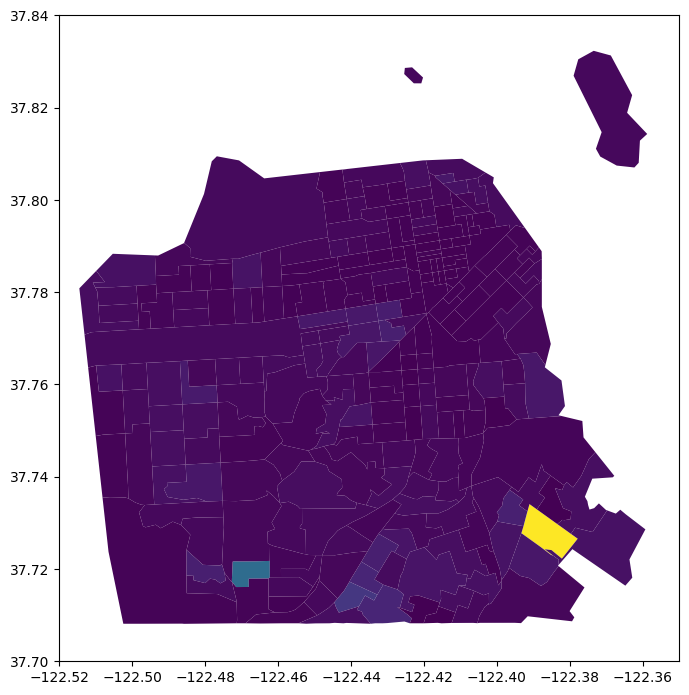

In [28]:
gpd.GeoDataFrame(tract_density[['geometry', 'sidewalk_density']])\
    .plot(column = "sidewalk_density", figsize = (8,10))
plt.xlim([-122.52, -122.35])
plt.ylim([37.7, 37.84])